In [45]:
!pip install atproto

In [46]:
!pip install requests beautifulsoup4 lxml

In [54]:
import requests
from bs4 import BeautifulSoup

# URL of the Bluesky post
url = "https://bsky.app/profile/jamellebouie.net/post/3lj4zhih7kk2a"

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}

# Send a GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "lxml")

    # Extract the title or meta tags
    title = soup.title.string if soup.title else "No title found"
    
    # Extract meta description (if available)
    meta_description = soup.find("meta", {"name": "description"})
    description = meta_description["content"] if meta_description else "No description found"

    print(f"Title: {title}")
    print(f"Description: {description}")

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


Title: @jamellebouie.net on Bluesky
Description: ah, as always, elon has his eyes on the prize: making it impossible for the government to enforce civil rights law

[contains quote post or other embedded content]


In [58]:
!pip install selenium webdriver-manager beautifulsoup4

In [60]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Profile URL of the post's owner
profile_url = "https://bsky.app/profile/jamellebouie.net"

# Setup WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in the background
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Open the profile page
driver.get(profile_url)

try:
    # Wait until the page loads completely
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "body"))
    )

    # Extract profile statistics using the correct class names (Adjust if needed)
    try:
        followers = driver.find_element(By.XPATH, "//span[contains(text(), 'Followers')]/preceding-sibling::span").text
    except:
        followers = "Not found"

    try:
        following = driver.find_element(By.XPATH, "//span[contains(text(), 'Following')]/preceding-sibling::span").text
    except:
        following = "Not found"

    try:
        posts = driver.find_element(By.XPATH, "//span[contains(text(), 'Posts')]/preceding-sibling::span").text
    except:
        posts = "Not found"

    print(f"Followers: {followers}")
    print(f"Following: {following}")
    print(f"Total Posts: {posts}")

except Exception as e:
    print("Error extracting data:", e)

# Close the browser
driver.quit()


Followers: Not found
Following: Not found
Total Posts: Not found


In [62]:
!pip install pytesseract transformers opencv-python numpy matplotlib pillow

In [64]:
!pip install transformers torch pillow matplotlib

In [66]:
!jupyter nbextension enable --py widgetsnbextension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run script server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.
(Deprecated) Installing extensions with the jupyter labextension install comma

In [78]:
import requests
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
from io import BytesIO

# AI-based OCR model setup
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed", use_fast=True)
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

def extract_post_details(url):
    """Extracts post details (username, description, image URL) from a Bluesky post."""
    response = requests.get(url)
    if response.status_code != 200:
        print("Error fetching the page")
        return None, None, None
    
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Extract username
    username_tag = soup.find("a", class_="username")
    username = username_tag.text.strip() if username_tag else "Unknown"
    
    # Extract description
    description_tag = soup.find("p")
    description = description_tag.text.strip() if description_tag else "No description found"
    
    # Extract image URL
    image_tag = soup.find("img")
    image_url = image_tag["src"] if image_tag else None
    
    return username, description, image_url

def download_image(image_url):
    """Downloads an image from a given URL."""
    response = requests.get(image_url)
    if response.status_code == 200:
        return Image.open(BytesIO(response.content)).convert("RGB")
    return None

def extract_text_from_image(image):
    """Extracts text from an image using AI-based OCR."""
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    extracted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return extracted_text

# Bluesky post URL (Replace with actual post URL)
post_url = "https://bsky.app/profile/jamellebouie.net/post/3lj4zhih7kk2a"

# Step 1: Extract post details
username, description, image_url = extract_post_details(post_url)

if username and description:
    print(f"🔹 Username: {username}")
    print(f"🔹 Description: {description}\n")
else:
    print("Failed to extract post details.")

# Step 2: Download and display post image
if image_url:
    post_image = download_image(image_url)
    if post_image:
        plt.figure(figsize=(10, 6))
        plt.imshow(post_image)
        plt.axis("off")
        plt.title("Extracted Post Image")
        plt.show()
        
        # Step 3: Extract text from the image using AI
        extracted_text = extract_text_from_image(post_image)
        print("🔹 Extracted Text from Image (AI-based OCR):\n")
        print(extracted_text)
    else:
        print("Failed to download post image.")
else:
    print("No image found in the post.")


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decode

🔹 Username: Unknown
🔹 Description: This is a heavily interactive web application, and JavaScript is required. Simple HTML interfaces are possible, but that is not what this is.
    Learn more about Bluesky at bsky.social and atproto.com.
    
Post
jamelle
jamellebouie.net
did:plc:nvfposmpmhegtyvhbs75s3pw
ah, as always, elon has his eyes on the prize: making it impossible for the government to enforce civil rights law

[contains quote post or other embedded content]
2025-02-27T04:09:23.751Z

No image found in the post.


📌 Username: jamelle: "ah, as always, elon has his eyes on the prize: making it impossible for the government to enforce civil rights law" — Bluesky
📝 Description: Description not found.
🖼️ Image URL: https://cdn.bsky.app/img/avatar_thumbnail/plain/did:plc:nvfposmpmhegtyvhbs75s3pw/bafkreiefjdjiahsa4upn3zabt4bxjfculjcxsdrxzc75nqlylfx7xo2izy@jpeg


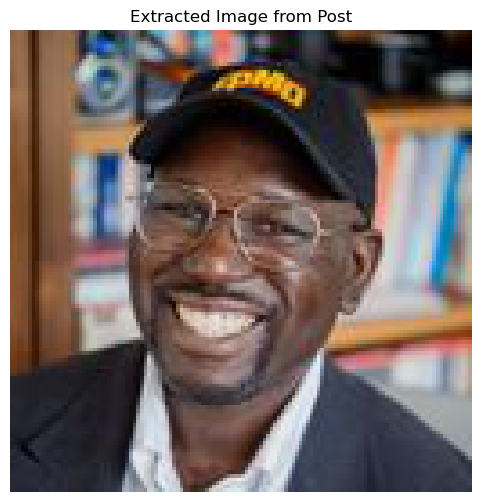

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decode


🔹 Extracted Text from Image (AI-based OCR):

:


In [86]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time
import requests
from PIL import Image
from io import BytesIO
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

# Step 1: Setup Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode (no GUI)
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Step 2: Load the post page
post_url = "https://bsky.app/profile/jamellebouie.net/post/3lj4zhih7kk2a"  # Replace with dynamic input
driver.get(post_url)
time.sleep(5)  # Wait for JavaScript content to load

# Step 3: Extract metadata
username = driver.title  # Page title usually contains username

try:
    # Find description inside <p> tags instead
    description_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "p"))
    )
    description = description_element.text
except:
    description = "Description not found."

# Extracting image URL dynamically
try:
    image_element = driver.find_element(By.TAG_NAME, "img")  # Adjust selector as needed
    image_url = image_element.get_attribute("src")
except:
    image_url = None

print(f"📌 Username: {username}")
print(f"📝 Description: {description}")
print(f"🖼️ Image URL: {image_url}")

driver.quit()  # Close Selenium

# Step 4: Download and display the image (if available)
if image_url:
    img_response = requests.get(image_url)
    image = Image.open(BytesIO(img_response.content)).convert("RGB")

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title("Extracted Image from Post")
    plt.show()

    # Step 5: AI-powered OCR to extract text from the image
    processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
    model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    extracted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Step 6: Display Extracted Text from Image
    print("\n🔹 Extracted Text from Image (AI-based OCR):\n")
    print(extracted_text)
else:
    print("\n❌ No image found in the post.")


📌 Username: @jamellebouie.net on Bluesky
📝 Description: Description not found.
🖼️ Image URL: https://cdn.bsky.app/img/feed_thumbnail/plain/did:plc:xv2as7miy7ghje2htfynaqex/bafkreiaqxaecb2vudpqnphkcdngzidsi5h434kvn4eoiqejv66wmt4zhoe@jpeg


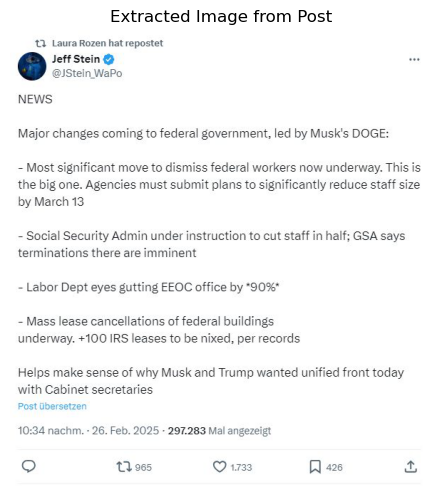

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decode


🔹 Extracted Text from Image (AI-based OCR):

CHANGE


In [88]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time
import requests
from PIL import Image
from io import BytesIO
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

# Step 1: Setup Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode (no GUI)
options.add_argument("--disable-blink-features=AutomationControlled")  # Bypass bot detection
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Step 2: Load the post page
post_url = "https://bsky.app/profile/jamellebouie.net/post/3lj4zhih7kk2a"  # Replace with dynamic input
driver.get(post_url)

# Step 3: Wait for elements to load
wait = WebDriverWait(driver, 10)

# Extract Username from the Page Title
username = driver.title

# Extract Post Description
try:
    description_element = wait.until(EC.presence_of_element_located((By.TAG_NAME, "p")))
    description = description_element.text
except:
    description = "Description not found."

# Extracting post image dynamically (NOT profile picture)
try:
    # Wait for all images to load
    wait.until(EC.presence_of_all_elements_located((By.TAG_NAME, "img")))
    
    # Get all images and filter the correct one
    image_elements = driver.find_elements(By.TAG_NAME, "img")
    
    # Find the image with the largest dimensions (likely the post image)
    image_url = None
    max_area = 0  # Track the largest image
    for img in image_elements:
        width = img.get_attribute("width")
        height = img.get_attribute("height")
        if width and height:
            area = int(width) * int(height)
            if area > max_area:
                max_area = area
                image_url = img.get_attribute("src")

except Exception as e:
    print(f"Error extracting image: {e}")
    image_url = None

print(f"📌 Username: {username}")
print(f"📝 Description: {description}")
print(f"🖼️ Image URL: {image_url}")

driver.quit()  # Close Selenium

# Step 4: Download and display the image (if available)
if image_url:
    img_response = requests.get(image_url)
    image = Image.open(BytesIO(img_response.content)).convert("RGB")

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title("Extracted Image from Post")
    plt.show()

    # Step 5: AI-powered OCR to extract text from the image
    processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
    model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    extracted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Step 6: Display Extracted Text from Image
    print("\n🔹 Extracted Text from Image (AI-based OCR):\n")
    print(extracted_text)
else:
    print("\n❌ No image found in the post.")
